# Making my own Multiple Linear Regression Model

In [31]:
import numpy as np

In [121]:
class myLR:

    def __init__(self):
        self.coef_ = None
        self.intercept_ = None

    def fit(self, X_train, y_train):
        X_train = np.insert(X_train, 0, 1, axis = 1)

        # calculating coeff
        betas = (np.linalg.inv(np.dot(X_train.T, X_train))).dot(X_train.T).dot(y_train) #it will  give values of beta (size of number of attribute)
        self.intercept_ = betas[0] #taking out value of b0
        self.coef_ = betas[1:] #reamining values of coeff
        
    def predict(self, X_test):
        y_pred =  self.intercept_ + np.dot(X_test, self.coef_)
        return y_pred

    def my_r2_score(self, y_test, y_pred):
        u = 0
        v = 0

        for i in range(len(y_pred)):            
            u += (y_test[i] - y_pred[i]) ** 2
            v += (y_test[i] - y_test.mean()) ** 2

        r2 = 1 - (u / v)

        return r2

    def my_mean_absolute_error(self, y_test, y_pred):
        ae = 0

        for i in range(len(y_test)):
            ae += abs(y_test[i] - y_pred[i])


        mae = ae / len(y_test)
        return mae

        
    def my_mean_squared_error(self, y_test, y_pred):
        se = 0

        for i in range(len(y_test)):
            se += (y_test[i] - y_pred[i]) ** 2

        mse = se / len(y_test)
        return mse

## Dataset ready

In [2]:
import numpy as np
from sklearn.datasets import load_diabetes

In [4]:
X, y = load_diabetes(return_X_y = True)

In [5]:
X

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286131, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04688253,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452873, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00422151,  0.00306441]])

In [6]:
y

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [7]:
X.shape

(442, 10)

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state = 2)

In [16]:
X_train.shape

(353, 10)

## Testing my model

In [122]:
l = myLR()
l.fit(X_train, y_train)

In [123]:
l.predict(X_test)

array([154.1213881 , 204.81835118, 124.93755353, 106.08950893,
       258.5348576 , 256.3310074 , 118.75087616, 119.52440696,
       101.50816735, 190.54048661, 141.70656811, 172.51883961,
       174.33861649, 134.80942706, 294.13994537,  94.11798038,
       211.97059795, 156.49579378, 134.21000428, 119.62664644,
       148.87842251, 165.00873409, 151.10021038, 176.04063756,
       133.27769647, 221.29555392, 197.17324941,  96.1577688 ,
        50.26012711, 230.48580317, 242.06073866, 114.11129218,
        67.07532417,  94.52943825, 201.21415375, 167.05136201,
       159.881268  , 192.78746659, 114.49551325, 233.48234551,
       140.82563045, 121.0680409 , 192.27480772, 191.12738845,
       179.16865788, 148.34935601, 163.47414622, 276.81647884,
       100.17926432, 164.10555298, 255.80762189, 136.9466204 ,
       152.37503699, 107.92237882, 194.21924678,  77.34670792,
       118.50482479,  68.38335763, 154.29258529, 162.48840259,
       168.36788326, 156.87790322,  97.14191797, 238.16

In [125]:
print("MAE :", l.my_mean_absolute_error(y_test, y_pred))
print("MSE :", l.my_mean_squared_error(y_test, y_pred))
print("R2 Score :", l.my_r2_score(y_test, y_pred))

MAE : 45.213034190469045
MSE : 3094.456671566062
R2 Score : 0.4399338661568968


## Using sklearn's LR

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
lr = LinearRegression() 

In [22]:
lr.fit(X_train, y_train)

LinearRegression()

In [24]:
y_pred = lr.predict(X_test)

In [25]:
from sklearn.metrics import r2_score

In [67]:
print("MAE :", mean_absolute_error(y_test, y_pred))
print("MSE :", mean_squared_error(y_test, y_pred))
print("R2 Score :", r2_score(y_test, y_pred))


MAE : 45.21303419046903
MSE : 3094.4566715660626
R2 Score : 0.4399338661568968


In [27]:
lr.coef_

array([  -9.15865318, -205.45432163,  516.69374454,  340.61999905,
       -895.5520019 ,  561.22067904,  153.89310954,  126.73139688,
        861.12700152,   52.42112238])

In [28]:
lr.intercept_

151.88331005254167

## Another example of MLR

In [32]:
from sklearn.datasets import make_regression
import pandas as pd
# import numpy as np

import plotly.express as px
import plotly.graph_objects as go

# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression

# from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [42]:
X, y = make_regression(n_samples = 100, n_features = 2, n_informative = 2, n_targets = 1, noise = 50)

In [43]:
df = pd.DataFrame({'feature1':X[:,0], 'feature2':X[:,1], 'target':y})

In [44]:
df.head()

,feature1,feature2,target
0,-1.783630,0.690409,-46.763848
1,-0.648842,-0.131758,-5.159177
2,-0.938061,0.312008,-4.682048
3,0.664716,0.489061,78.842578
4,-0.666671,1.228172,-18.353826


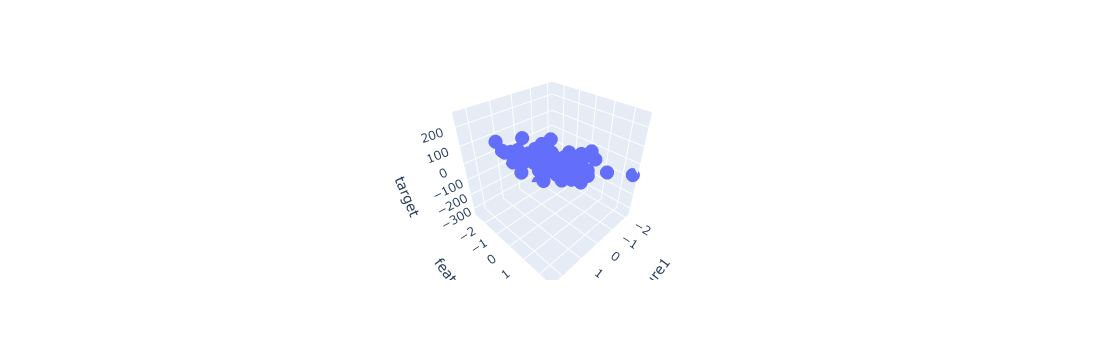

In [45]:
fig = px.scatter_3d(df, x = 'feature1', y = 'feature2', z = 'target')

fig.show()

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 3)

In [47]:
lr = LinearRegression()

In [48]:
lr.fit(X_train, y_train)

LinearRegression()

In [49]:
y_pred = lr.predict(X_test)

In [50]:
print("MAE :", mean_absolute_error(y_test, y_pred))
print("MSE :", mean_squared_error(y_test, y_pred))
print("R2 Score :", r2_score(y_test, y_pred))


MAE : 46.6051016268339
MSE : 3441.3372548066427
R2 Score : 0.8152442217034626


In [54]:

x = np.linspace(-5, 5, 10)
y = np.linspace(-5, 5, 10)
xGrid, yGrid = np.meshgrid(y, x)

final = np.vstack((xGrid.ravel().reshape(1,100),yGrid.ravel().reshape(1,100))).T


z_final = lr.predict(final).reshape(10,10)

z = z_final



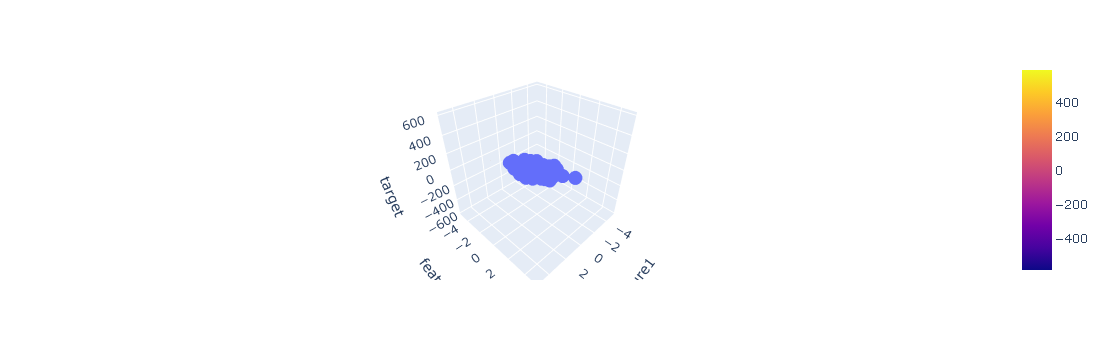

In [55]:

fig = px.scatter_3d(df, x='feature1', y='feature2', z='target')

fig.add_trace(go.Surface(x = x, y = y, z = z ))

fig.show()

In [56]:
lr.coef_

array([80.51757432, 37.36839936])

In [57]:
lr.intercept_

3.433654435978548